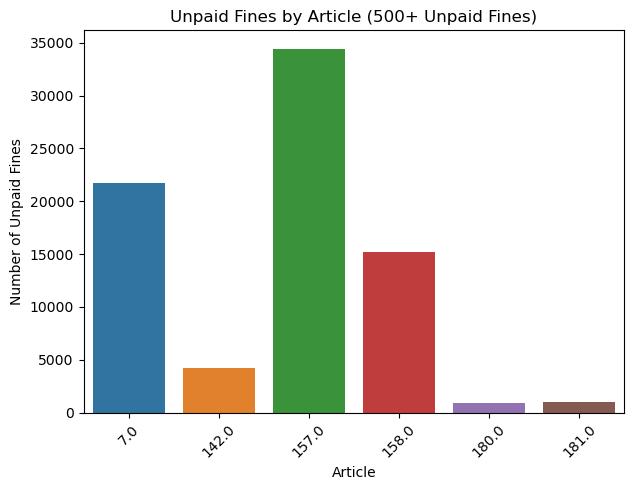

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' contains the DataFrame with the data
df = pd.read_csv('Road_Traffic_Fine_Management_Process.csv')
# Step 1: Calculate the totalAmountWithExpense
df['totalAmountWithExpense'] = df['amount'] + df['expense']

# Step 2: Filter unpaid fines
unpaid_fines = df.groupby('Case ID').filter(lambda x: (x['paymentAmount'].sum() == 0) | (x['totalPaymentAmount'].max() < x['totalAmountWithExpense'].max()))

# Step 3: Categorize Circumstances
non_paid_activities = unpaid_fines['Activity'].value_counts()
unpaid_fine_amount_ranges = pd.cut(unpaid_fines['totalAmountWithExpense'], bins=[0, 50, 100, 200, 500, float('inf')])

# Second subplot for article (filtering articles with 500+ unpaid fines)
plt.figure(figsize=(12, 5))  # Increase the figure size to adjust the width
plt.subplot(1, 2, 2)
article_counts = unpaid_fines['article'].value_counts()
article_counts = article_counts[article_counts >= 500]  # Filter articles with 500+ unpaid fines
sns.barplot(x=article_counts.index, y=article_counts.values)
plt.title('Unpaid Fines by Article (500+ Unpaid Fines)')
plt.ylabel('Number of Unpaid Fines')
plt.xlabel('Article')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust the layout to prevent overlapping of subplots
plt.show()

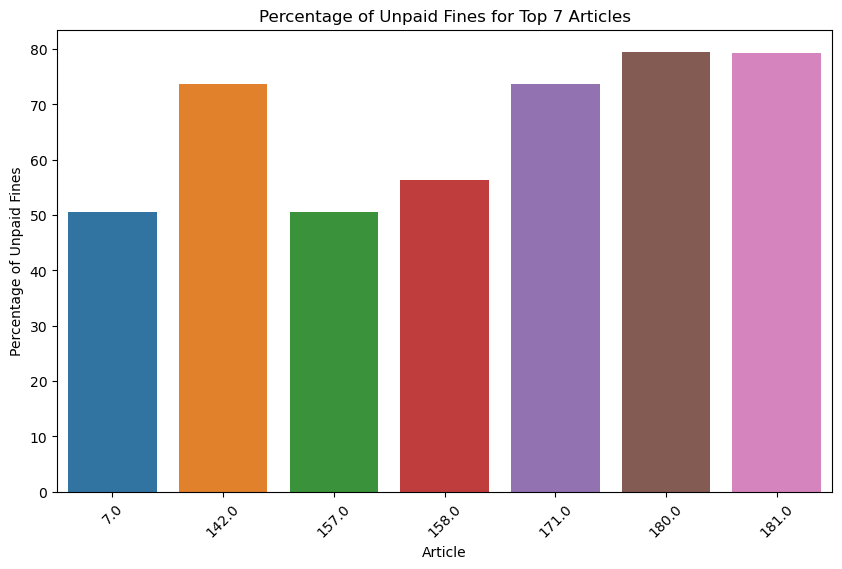

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' contains the DataFrame with the data
df = pd.read_csv('Road_Traffic_Fine_Management_Process.csv')

# Step 1: Calculate the totalAmountWithExpense
df['totalAmountWithExpense'] = df['amount'] + df['expense']

# Step 2: Count the total number of cases for each article
article_counts = df['article'].value_counts()

# Step 3: Filter and count unpaid fines
unpaid_fines = df.groupby('Case ID').filter(lambda x: (x['paymentAmount'].sum() == 0) | (x['totalPaymentAmount'].max() < x['totalAmountWithExpense'].max()))
unpaid_article_counts = unpaid_fines['article'].value_counts()

# Step 4: Calculate the percentage of unpaid cases for each article
percentage_unpaid = (unpaid_article_counts / article_counts) * 100
percentage_unpaid = percentage_unpaid[percentage_unpaid.index.isin(article_counts.nlargest(7).index)]

# Step 5: Data Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_unpaid.index, y=percentage_unpaid.values)
plt.title('Percentage of Unpaid Fines for Top 7 Articles')
plt.xlabel('Article')
plt.ylabel('Percentage of Unpaid Fines')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' contains the DataFrame with the data
df = pd.read_csv('Road_Traffic_Fine_Management_Process.csv')

# Step 1: Calculate the totalAmountWithExpense
df['totalAmountWithExpense'] = df['amount'] + df['expense']

# Step 2: Count the total number of cases for each article
article_counts = df['article'].value_counts()

# Step 3: Filter and count unpaid fines
unpaid_fines = df.groupby('Case ID').filter(lambda x: (x['paymentAmount'].sum() == 0) | (x['totalPaymentAmount'].max() < x['totalAmountWithExpense'].max()))
unpaid_article_counts = unpaid_fines['article'].value_counts()

# Step 4: Calculate the percentage of unpaid cases for each article
percentage_unpaid = (unpaid_article_counts / article_counts) * 100
percentage_unpaid = percentage_unpaid[percentage_unpaid.index.isin(article_counts.nlargest(7).index)]

# Step 5: Data Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_unpaid.index, y=percentage_unpaid.values)
plt.title('Percentage of Unpaid Fines for Top 7 Articles')
plt.xlabel('Article')
plt.ylabel('Percentage of Unpaid Fines')
plt.xticks(rotation=45)
plt.show()
